In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check shapes
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [3]:
# Reshape to fit CNN (add channel dimension)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalize (make values 0–1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [4]:
model = Sequential()

# 1st Convolution layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

# 2nd Convolution layer
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

# Flatten → Fully Connected
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # prevent overfitting
model.add(Dense(10, activation='softmax'))

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 93ms/step - accuracy: 0.8021 - loss: 0.6218 - val_accuracy: 0.9792 - val_loss: 0.0665
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 92ms/step - accuracy: 0.9671 - loss: 0.1119 - val_accuracy: 0.9851 - val_loss: 0.0453
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.9769 - loss: 0.0787 - val_accuracy: 0.9872 - val_loss: 0.0354
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 98ms/step - accuracy: 0.9815 - loss: 0.0612 - val_accuracy: 0.9897 - val_loss: 0.0308
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 91ms/step - accuracy: 0.9841 - loss: 0.0532 - val_accuracy: 0.9896 - val_loss: 0.0282


In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9873 - loss: 0.0345
Test Accuracy: 0.9896000027656555


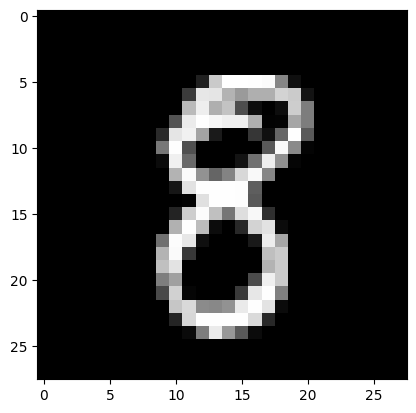

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted Digit: 8


In [7]:
# Pick a random test image
index = np.random.randint(0, len(x_test))
img = x_test[index]

plt.imshow(img.reshape(28,28), cmap="gray")
plt.show()

# Predict
prediction = model.predict(img.reshape(1,28,28,1))
print("Predicted Digit:", np.argmax(prediction))


In [9]:
# Save in new Keras format
model.save("mnist_digit_recognizer.keras")


In [11]:
from tensorflow.keras.models import load_model

# Load without worrying about optimizer
model = load_model("mnist_digit_recognizer.keras", compile=False)

# Recompile (if you want to train further or evaluate)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

